In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
from collections import Counter 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your data in a DataFrame with features in 'X' and target in 'y'
# Replace this with your actual data loading process
df= pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/New/newmalwaredata80.csv')
#df['Class'] = df['Class'].replace({'Benign': 0, 'Malware': 1})
X = df.drop(columns=['Class'])
y = df['Class']

In [3]:
# Set the desired number of samples for both class 0 and class 1 (e.g., 1000 each)
desired_samples_class_0 = 29298
desired_samples_class_1 = 29298

# Initialize RandomOverSampler
ros = RandomOverSampler(sampling_strategy={0: desired_samples_class_0, 1: desired_samples_class_1}, random_state=42)

# Apply Random Oversampling to generate exactly 1000 synthetic samples for each class
X_resampled, y_resampled = ros.fit_resample(X, y)

# The resampled data will be in X_resampled and y_resampled
# Now you can use this resampled data for training your model
# Convert the resampled data back to a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Class'] = y_resampled


/home/masharifin/.local/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (29298) in class 0 will be larger than the number of samples in the majority class (class #0 -> 28700)
  warnings.warn(
/home/masharifin/.local/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (29298) in class 1 will be larger than the number of samples in the majority class (class #0 -> 28700)
  warnings.warn(


In [4]:
import pandas as pd

In [5]:
# Save the resampled data to a new CSV file
resampled_data.to_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/resampled_data_randomsample.csv', index=False)


In [65]:
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/resampled_data_randomsample.csv')
#dr['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})

In [66]:
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/ObfuscatedMalMem2022.csv')
dc['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})

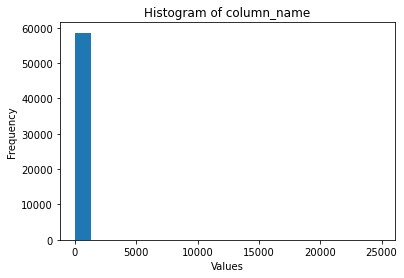

In [67]:
# Example visualization: Histogram
plt.hist(dc['pslist.avg_handlers'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

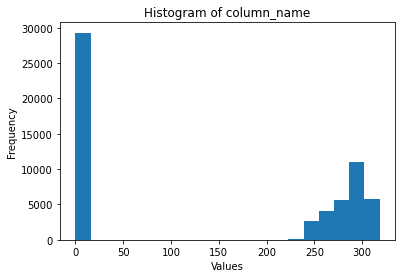

In [68]:
# Example visualization: Histogram
plt.hist(dr['pslist.avg_handlers'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

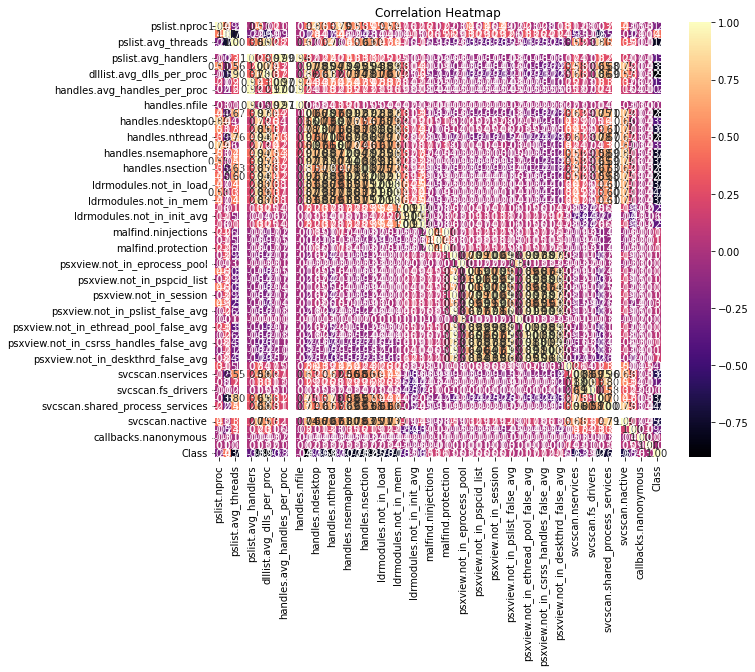

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generate heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(dc.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title("Correlation Heatmap")  # Set the title of the heatmap
plt.show()

In [70]:
# # List of columns to drop
# columns_to_drop_dc = ['ldrmodules.not_in_init_avg', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg']

# # Drop the specified columns
# dc.drop(columns=columns_to_drop_dc, inplace=True)

# dc.info()


In [71]:
# # List of columns to drop
# columns_to_drop_dr = ['apihooks.nhooks', 'apihooks.nhooksInline', 'apihooks.nhooksUsermode']

# # Drop the specified columns
# dr.drop(columns=columns_to_drop_dr, inplace=True)

# dr.info()

In [72]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [73]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

In [74]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# x_shuffled, y_shuffled = shuffle(x, y, random_state=42)
# train_size = 0.7
# X_train, X_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, train_size=train_size, random_state=42)
# print("Train set size:", X_train.shape[0])
# print("Test set size:", X_test.shape[0])

In [16]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['Benign','Malicious'], columns=['Benign','Malicious'])
    cm.index.name = 'Actual Attack'
    cm.columns.name = 'Predicted Attack'
    #cm.labels.name=['No','Yes']
    fig, ax = plt.subplots(figsize=figsize)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    sns.heatmap(cm, cmap= 'Reds',cbar=False, annot=annot,fmt='', ax=ax)

# Random_Model_1: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
import pickle# save the model to disk
filename_dt= 'Binary_security_dt_rm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_rm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

In [ ]:
# Get the feature importance scores from the trained XGBoost model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature matrix X and target variable y

# Initialize your model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Random_Model_2: Random forest

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

In [ ]:
import pickle# save the model to disk
filename_rf= 'Binary_security_rf_rm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_rm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

In [ ]:
# Get the feature importance scores from the trained XGBoost model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Random)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Random_Model_3: LGB

In [ ]:
import lightgbm  as lgb
# lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
# lgb_nor.fit(X_train,y_train)
# y_pred_lgbm =lgb_nor.predict(X_test)
# print(y_pred_lgbm)
# # Predict on training and test sets
# y_pred_train_lgb = lgb_nor.predict(X_train)
# y_pred_test_lgb = lgb_nor.predict(X_test)

# # Calculate accuracy on training and test sets
# accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
# accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

# print(f"Training Accuracy: {accuracy_train_lgb}")
# print(f"Test Accuracy: {accuracy_test_lgb}")

In [ ]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

In [ ]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

In [ ]:
print("",classification_report(y_test,y_pred_lgbm))

In [ ]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

In [ ]:
import pickle# save the model to disk
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_rm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

In [ ]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

In [ ]:
import xgboost as xgb
xgb_nor=xgb.XGBClassifier(n_jobs=-1)
xgb_nor.fit(X_train,y_train)
y_pred_xgb_nor=xgb_nor.predict(X_test)
 # Predict on training and test sets
y_pred_train_xgb = xgb_nor.predict(X_train)
y_pred_test_xgb = xgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f"Training Accuracy: {accuracy_train_xgb}")
print(f"Test Accuracy: {accuracy_test_xgb}")

# Random Model_4: Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Predict on training and test sets
y_pred_train_svc = svm_model.predict(X_train)
y_pred_test_svc = svm_model.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(f"Training Accuracy: {accuracy_train_svc}")
print(f"Test Accuracy: {accuracy_test_svc}")

In [ ]:
import pickle# save the model to disk
filename_svc= 'Binary_security_svc_rm.sav'
pickle.dump(svm_model, open(filename_svc, 'wb'))
load_model_svc=pickle.load(open('Binary_security_svc_rm.sav','rb'))
load_pred_svc=load_model_svc.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_svc)
plt.savefig('cm.eps',dpi=600)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(svm_model, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Random Model_5: GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

In [ ]:
import pickle# save the model to disk
filename_nb= 'Binary_security_nb_rm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_rm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Random Model_6:ANN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


In [ ]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

In [ ]:
from keras.models import load_model

# Save the ANN model to disk
model_ann.save('Binary_security_ann_rm.h5')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_rm.h5')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

# Random Model_7:CNN

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
import tensorflow as tf


# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


1648/1648 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9947 - val_loss: 0.0090 - val_accuracy: 0.9997
Epoch 2/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9963 - val_loss: 0.0165 - val_accuracy: 0.9991
Epoch 3/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9965 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9970 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9970 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9972 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0167 - accuracy: 0.9971 - val_loss: 0.0087 - val_accuracy: 1.0000
Epo

# Attack On CNN

In [76]:
from tensorflow.keras.models import load_model

# Assuming you have trained and compiled your model and stored it in 'model' variable

# Save the model to an HDF5 file
model_cnn.save('malmemcnn.h5')


In [77]:
# FGSM Attack
epsilon = 90 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image


In [78]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [79]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)
#test_example_tensor

In [80]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 15ms/step - loss: 101.6845 - accuracy: 0.0000e+00
Adversarial accuracy: 0.000000


JSMA Attack On CNN

In [89]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Load your trained model
model = load_model('malmemcnn.h5')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 0.8 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]


In [90]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map
# # Define a function to compute the saliency map
# def compute_saliency_map(input_image, target_class):
#     with tf.GradientTape() as tape:
#         tape.watch(input_image)
#         prediction = model(input_image)
#         target_probability = prediction[0, target_class]
    
#     gradient = tape.gradient(target_probability, input_image)
#     saliency_map = tf.abs(gradient)
    
#     return saliency_map


# Define a function to generate adversarial examples using JSMA
def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()


In [91]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [92]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 13ms/step


In [ ]:
adversarial_example

In [93]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 13ms/step
Original prediction: [[5.726137e-05]]
Adversarial prediction: [[0.]]


The results you provided indicate the predictions of your model for both the original example and the adversarial example generated using the JSMA attack. Let's break down the meaning of these results:

Original prediction: [[1.]]: This line indicates the prediction made by your model on the original input example. In this case, your model predicts a probability of 1.0 for the positive class (class 1). This means that your model is very confident that the input example belongs to the positive class.

Adversarial prediction: [[1.]]: This line indicates the prediction made by your model on the adversarial example generated using the JSMA attack. Again, your model predicts a probability of 1.0 for the positive class (class 1). This suggests that even after introducing the adversarial perturbations through the JSMA attack, your model still confidently predicts the positive class for the adversarial example.

The result suggests that the JSMA attack might not have been successful in changing the model's prediction from the original class to the targeted class. Adversarial attacks like JSMA can have varying degrees of success depending on the model architecture, the target class, the choice of input features, and the chosen perturbation limits.

Keep in mind that obtaining different results might require experimenting with different parameters, such as the target class, epsilon (perturbation limit), and even the specific input example. Additionally, evaluating the adversarial robustness of a model involves testing it on a larger set of examples and measuring the overall success rate of the attack.

The results you provided indicate the predictions of your model for both the original example and the adversarial example generated using the JSMA attack. Let's analyze the meaning of these results:

Original prediction: [[0.00060511]]: This line indicates the prediction made by your model on the original input example. In this case, your model predicts a very low probability of 0.00060511 for the positive class (class 1). This suggests that your model is confident that the input example belongs to the negative class (class 0).

Adversarial prediction: [[1.]]: This line indicates the prediction made by your model on the adversarial example generated using the JSMA attack. Your model predicts a probability of 1.0 for the positive class (class 1) for the adversarial example. This means that, after applying the JSMA attack, your model now confidently predicts the positive class for the adversarial example, even though it originally predicted the negative class for the original example.

The result indicates that the JSMA attack was successful in changing the model's prediction from the negative class to the positive class for the adversarial example. This shift in prediction shows that the adversarial perturbations introduced by the JSMA attack were able to deceive the model and lead it to misclassify the example.

This result highlights the susceptibility of your model to adversarial attacks and the importance of developing robust machine learning models that can handle such manipulations effectively.

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


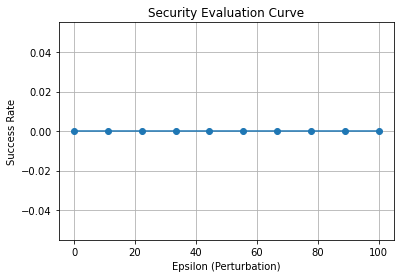

In [86]:
import matplotlib.pyplot as plt

# Define the range of epsilon values
epsilon_values = np.linspace(0, 100, num=10)

# Initialize an array to store success rates for each epsilon
success_rates = []

# Iterate through each epsilon value
for epsilon in epsilon_values:
    # Generate adversarial example using JSMA
    adversarial_example = jsma_attack(test_example, target_class, epsilon)
    
    # Evaluate the model on the adversarial example
    adversarial_prediction = model.predict(adversarial_example)
    
    # Check if the attack is successful (changed predicted class)
    if np.argmax(adversarial_prediction) != target_class:
        success_rates.append(1)  # Attack successful
    else:
        success_rates.append(0)  # Attack unsuccessful

# Plot the security evaluation curve
plt.plot(epsilon_values, success_rates, marker='o')
plt.xlabel('Epsilon (Perturbation)')
plt.ylabel('Success Rate')
plt.title('Security Evaluation Curve')
plt.grid(True)
plt.show()


# ROC 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

In [ ]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    #'XGB':xgb_nor.predict_proba(X_test)[:,1],
    #'SVC':svm_model.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    #'ANN':model_ann.predict_proba(X_test)[:,1],
#     'ANN': model_ann.predict(X_test)[:, 0],  # Use [:, 0] for positive class probability
#     'CNN': model_cnn.predict(X_test)[:, 0]  # Use [:, 0] for positive class probability
    })

In [ ]:
proba_df.to_csv('probability.csv')

In [ ]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [ ]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,xgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','XGBM','NB']
est_1=est(clf,name)

In [ ]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


In [ ]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

In [ ]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics.csv')